In [1]:
%matplotlib inline

In [2]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts

In [3]:
#files to load
city_data_load = "Resources/city_data.csv"
ride_data_load = "Resources/ride_data.csv"



In [4]:
#city read and df 
city_data_df = pd.read_csv(city_data_load)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
#ride read and df 
ride_data_df = pd.read_csv(ride_data_load)

ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [6]:
#inspect city data 
city_count = city_data_df.groupby("type").count()["city"]
city_count


type
Rural       18
Suburban    36
Urban       66
Name: city, dtype: int64

In [7]:
#inspect ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [8]:
#merge 

df = pd.merge( ride_data_df, city_data_df, how = "left", on =["city", "city"])

df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [9]:
#urban df
urban_df = df[df["type"] == "Urban"]

urban_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [10]:
#rural df 
rural_df = df[df["type"]=="Rural"]
rural_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [11]:
#suburban df
suburban_df = df[df["type"]=="Suburban"]
suburban_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [12]:
# get ride count for each city type 

urban_ride_count = urban_df.groupby("city").count()["ride_id"]

urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [13]:
rural_ride_count = rural_df.groupby("city").count()["ride_id"]

rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [14]:
suburban_ride_count = suburban_df.groupby("city").count()["ride_id"]

suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [15]:
# average fare for each city type

urban_fare_mean = urban_df.groupby("city").mean()["fare"]

urban_fare_mean

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [16]:
suburban_fare_mean = suburban_df.groupby("city").mean()["fare"]

suburban_fare_mean

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [17]:
rural_fare_mean = rural_df.groupby("city").mean()["fare"]

rural_fare_mean

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [18]:
#average number of drivers 
urban_driver_mean = urban_df.groupby("city").mean()["driver_count"]

urban_driver_mean

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [19]:
rural_driver_mean = rural_df.groupby("city").mean()["driver_count"]

rural_driver_mean

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

In [20]:
suburban_driver_mean = suburban_df.groupby("city").mean()["driver_count"]

suburban_driver_mean

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

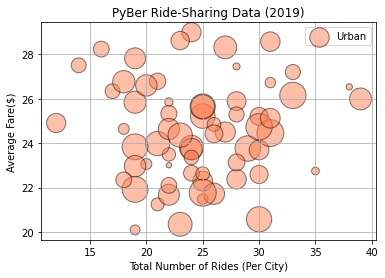

In [21]:




#scatter plot urban
plt.scatter(urban_ride_count, 
    urban_fare_mean, 
    s=10*urban_driver_mean, 
    alpha = 0.5,
    edgecolors= "k", linewidths= 1,
    color = "coral",
    label = "Urban")

#title
plt.title("PyBer Ride-Sharing Data (2019)")

#labels for axes
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

#grid
plt.grid()

#legend
plt.legend()


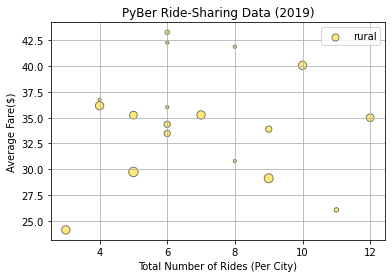

In [22]:
#scatter plot rural
plt.scatter(rural_ride_count, 
    rural_fare_mean, 
    s=10*rural_driver_mean, 
    alpha = 0.5,
    edgecolors= "k", linewidths= 1,
    color = "gold",
    label = "rural")

#title
plt.title("PyBer Ride-Sharing Data (2019)")

#labels for axes
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

#grid
plt.grid()

#legend
plt.legend()

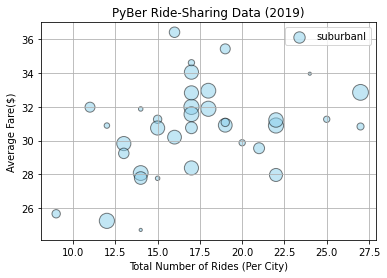

In [23]:
#scatter plot suburban 
plt.scatter(suburban_ride_count, 
    suburban_fare_mean, 
    s=10*suburban_driver_mean, 
    alpha = 0.5,
    edgecolors= "k", linewidths= 1,
    color = "skyblue",
    label = "suburbanl")

#title
plt.title("PyBer Ride-Sharing Data (2019)")

#labels for axes
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

#grid
plt.grid()

#legend
plt.legend()

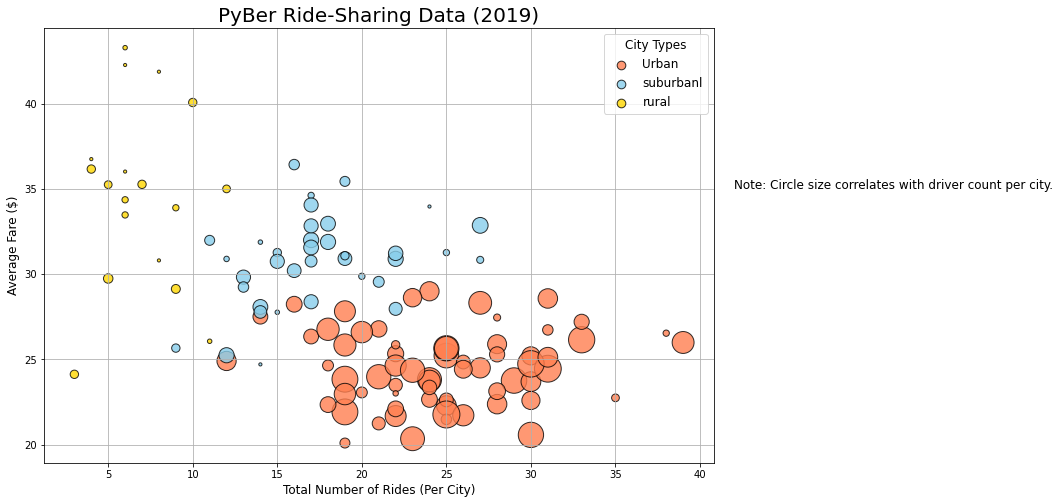

In [24]:
#bubble chart for all cities 

plt.figure(figsize=(12,8))

#urban
plt.scatter(urban_ride_count, 
    urban_fare_mean, 
    s=10*urban_driver_mean, 
    alpha = 0.8,
    edgecolors= "k", linewidths= 1,
    color = "coral",
    label = "Urban")

#suburban 
plt.scatter(suburban_ride_count, 
    suburban_fare_mean, 
    s=10*suburban_driver_mean, 
    alpha = 0.8,
    edgecolors= "k", linewidths= 1,
    color = "skyblue",
    label = "suburbanl")

#rural
plt.scatter(rural_ride_count, 
    rural_fare_mean, 
    s=10*rural_driver_mean, 
    alpha = 0.8,
    edgecolors= "k", linewidths= 1,
    color = "gold",
    label = "rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#legend formatting 
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#note
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#save figure
plt.savefig("analysis/Fig1.png")

plt.show()

In [25]:
#summary statistics
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [26]:
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [27]:
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [28]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
#pandas mean median mode methods
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [30]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [31]:
#fare summary statistics

urban_fares = urban_df["fare"]
suburban_fares = suburban_df["fare"]
rural_fares = rural_df["fare"]

In [32]:
urban_fares.mean()

24.52577230769236

In [33]:
#numpy and stats methods
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $22.86.


In [34]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.


StatisticsError: no unique mode; found 4 equally common values

In [35]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.


StatisticsError: no unique mode; found 3 equally common values

In [36]:
#get driver count into new series

urban_drivers = urban_df["driver_count"]
suburban_drivers = suburban_df["driver_count"]
rural_drivers = rural_df["driver_count"] 


In [37]:
# Calculate the measures of central tendency for the driver for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

The mean driver count for urban cities is 37.
The median driver count for urban cities is 37.
The mode driver count for urban cities is 39.


In [38]:
# Calculate the measures of central tendency for the driver for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

The mean driver count for suburban cities is 14.
The median driver count for suburban cities is 16.
The mode driver count for suburban cities is 20.


In [39]:
# Calculate the measures of central tendency for the driver for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")

The mean driver count for rural cities is 4.
The median driver count for rural cities is 4.
The mode driver count for rural cities is 1.


In [40]:
#box and whisker plots for outliers, visualization of summary statistics 
#use axboxplot(array)

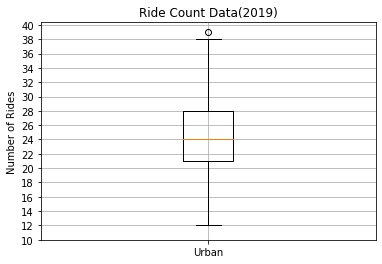

In [41]:
#urban cities ride count box and whisker

#set up basic 
x_labels = ["Urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)

# title, labels, grid 

ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

plt.show()

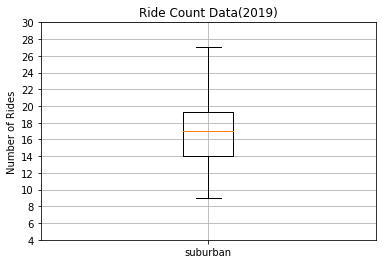

In [42]:
#suburban cities ride count box and whisker

#set up basic 
x_labels = ["suburban"]
fig, ax = plt.subplots()

ax.boxplot(suburban_ride_count, labels=x_labels)

# title, labels, grid 

ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(4, 32, step=2.0))
ax.grid()

plt.show()

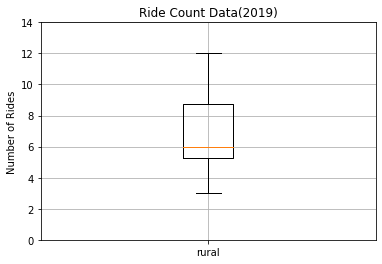

In [43]:
#rural cities ride count box and whisker

#set up basic 
x_labels = ["rural"]
fig, ax = plt.subplots()

ax.boxplot(rural_ride_count, labels=x_labels)

# title, labels, grid 

ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 15, step=2.0))
ax.grid()

plt.show()

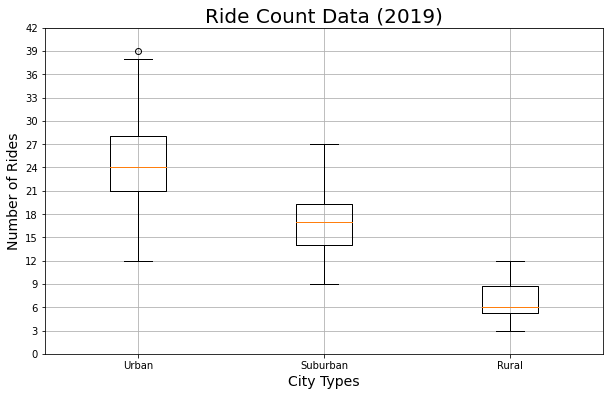

In [44]:
#ride count combined box and whiskers

# Add all ride count box-and-whisker plots to the same graph.

#set up x labels, variable for all cities, fig ax w size 
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))

#format title and labels
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

#plot 
ax.boxplot(ride_count_data, labels=x_labels)

#format ticks and grid 
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()



In [45]:
#get the outlier urban 39 rides

#use previous urban ride count (series with city as index)

urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]

print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


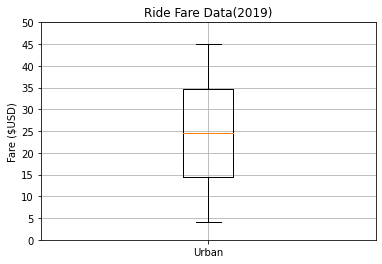

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [46]:
# ride fare data box and whisker

#set up basic 
x_labels = ["Urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_fares, labels=x_labels)

# title, labels, grid 

ax.set_title("Ride Fare Data(2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 55, step=5.0))
ax.grid()

plt.show()

#summary stats
print("Summary Statistics")
urban_fares.describe()

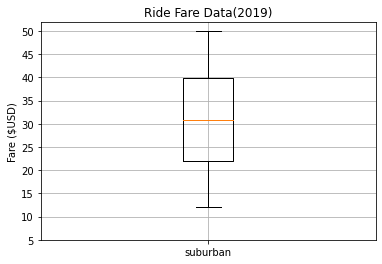

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [47]:
# ride fare data box and whisker

#set up basic 
x_labels = ["suburban"]
fig, ax = plt.subplots()

ax.boxplot(suburban_fares, labels=x_labels)

# title, labels, grid 

ax.set_title("Ride Fare Data(2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(5, 55, step=5.0))
ax.grid()

plt.show()

#summary stats
print("Summary Statistics")
suburban_fares.describe()

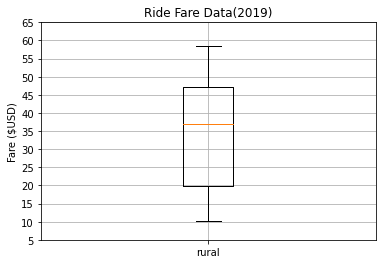

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [48]:
# ride fare data box and whisker

#set up basic 
x_labels = ["rural"]
fig, ax = plt.subplots()

ax.boxplot(rural_fares, labels=x_labels)

# title, labels, grid 

ax.set_title("Ride Fare Data(2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(5, 70, step=5.0))
ax.grid()

plt.show()

#summary stats
print("Summary Statistics")
rural_fares.describe()

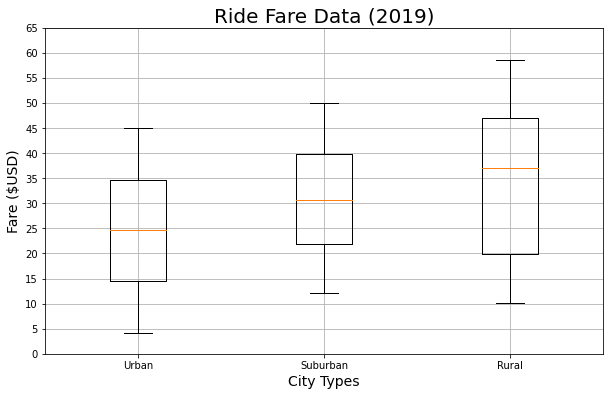

In [49]:
#set up
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))

#format titles and labels
ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_ylabel("Fare ($USD)", fontsize = 14)
ax.set_xlabel("City Types", fontsize =14)

#plot
ax.boxplot(fare_data, labels = x_labels)

#ticks and grid
ax.set_yticks(np.arange(0, 70, step=5.0))
ax.grid()

#print and show 
plt.savefig("analysis/Fig3.png")
plt.show()

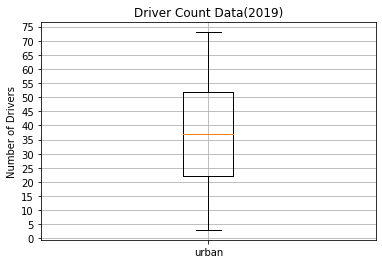

In [50]:
#box and whisker driver count

#set up basic 
x_labels = ["urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_drivers, labels=x_labels)

# title, labels, grid 

ax.set_title("Driver Count Data(2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

plt.show()

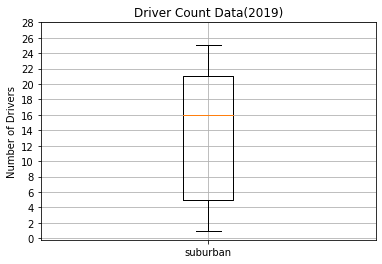

In [51]:
#box and whisker driver count

#set up basic 
x_labels = ["suburban"]
fig, ax = plt.subplots()

ax.boxplot(suburban_drivers, labels=x_labels)

# title, labels, grid 

ax.set_title("Driver Count Data(2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()

plt.show()

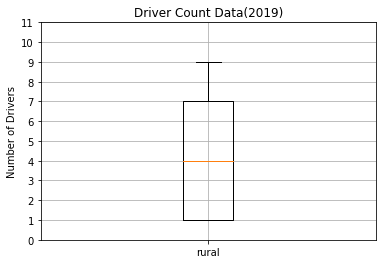

In [52]:
#box and whisker driver count

#set up basic 
x_labels = ["rural"]
fig, ax = plt.subplots()

ax.boxplot(rural_drivers, labels=x_labels)

# title, labels, grid 

ax.set_title("Driver Count Data(2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 12, step=1.0))
ax.grid()

plt.show()

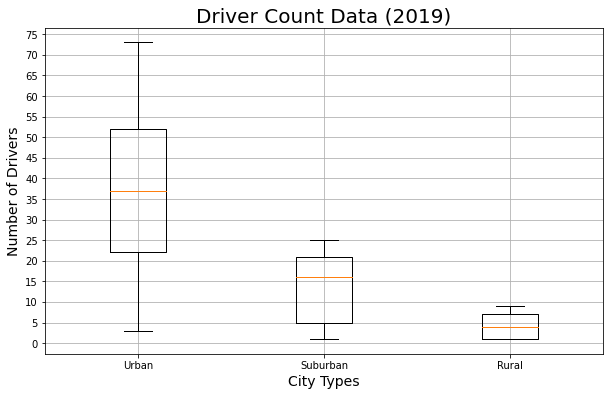

In [53]:
# driver count combined box plot

# Add all Driver count box-and-whisker plots to the same graph.

#set up x labels, variable for all cities, fig ax w size 
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))

#format title and labels
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

#plot 
ax.boxplot(driver_count_data, labels=x_labels)

#format ticks and grid 
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()


In [54]:
# percentage of fares for each city type 

type_fare = df.groupby("type").sum()["fare"]
type_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [55]:
total_fare = df["fare"].sum()
total_fare

63538.64

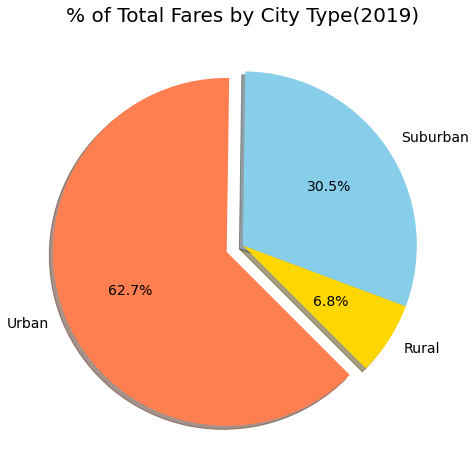

In [63]:
import matplotlib as mpl


fare_labels = "Rural", "Suburban", "Urban"

colors = ["Gold", "Skyblue", "Coral"]

explode_values = [0, 0, 0.1]

plt.subplots(figsize = (10,8))

plt.pie(type_fare,
        labels=fare_labels,
        autopct="%.1f%%",
        startangle=-45,
        colors=colors,
        shadow=True,
        explode=explode_values)

plt.title("% of Total Fares by City Type(2019)", fontsize=20)

#use matplotlib mlp to change font size of parameters
mpl.rcParams['font.size']=14

#save
plt.savefig("analysis/Fig5.png")
plt.show()

In [62]:
#pie percent of total drivers by city type
type_drivers = df.groupby("type").sum()["driver_count"]
type_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

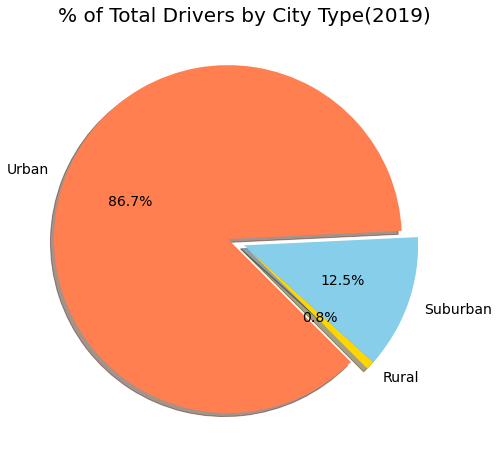

In [70]:


driver_labels = "Rural", "Suburban", "Urban"

colors = ["Gold", "Skyblue", "Coral"]

explode_values = [0, 0, 0.1]

plt.subplots(figsize = (10,8))

plt.pie(type_drivers,
        labels=driver_labels,
        autopct="%.1f%%",
        startangle=-45,
        colors=colors,
        shadow=True,
        explode=explode_values)

plt.title("% of Total Drivers by City Type(2019)", fontsize=20)

#use matplotlib mlp to change font size of parameters
mpl.rcParams['font.size']=14

#save
plt.savefig("analysis/Fig6.png")
plt.show()



In [71]:
# pie percent of total rides by city type 

type_rides = df.groupby("type").sum()["ride_id"]
type_rides

type
Rural        580968240341287
Suburban    3106884522576766
Urban       7919412664056093
Name: ride_id, dtype: int64

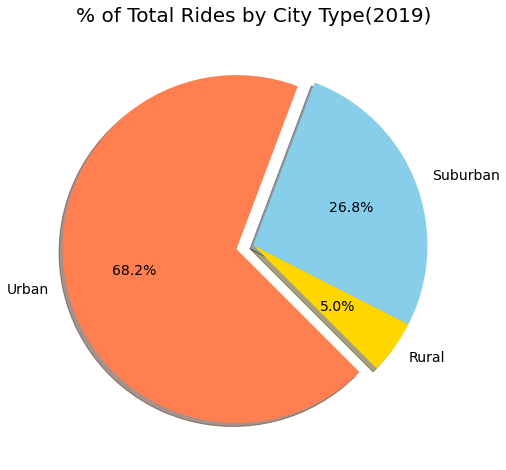

In [72]:

rides_labels = "Rural", "Suburban", "Urban"

colors = ["Gold", "Skyblue", "Coral"]

explode_values = [0, 0, 0.1]

plt.subplots(figsize = (10,8))

plt.pie(type_rides,
        labels=rides_labels,
        autopct="%.1f%%",
        startangle=-45,
        colors=colors,
        shadow=True,
        explode=explode_values)

plt.title("% of Total Rides by City Type(2019)", fontsize=20)

#use matplotlib mlp to change font size of parameters
mpl.rcParams['font.size']=14

#save
plt.savefig("analysis/Fig7.png")
plt.show()